In [1]:
import sys
sys.path.append('../..')
import ugent

In [2]:
import numpy as np

seigs = np.array([2*i for  i in range(1, 50) for _ in range(i)][:50], dtype="float")
seigs

array([ 2.,  4.,  4.,  6.,  6.,  6.,  8.,  8.,  8.,  8., 10., 10., 10.,
       10., 10., 12., 12., 12., 12., 12., 12., 14., 14., 14., 14., 14.,
       14., 14., 16., 16., 16., 16., 16., 16., 16., 16., 18., 18., 18.,
       18., 18., 18., 18., 18., 18., 20., 20., 20., 20., 20.])

In [18]:
from pyslise2d import Pyslise2D

def V(x, y):
    return x*x + y*y

mx = 9.5
my = 9.5

p = Pyslise2D(V, -mx,mx, -my,my, tolerance=10**-12, N=25)
p.eigenvaluesByIndex(0, 201)

[(0, 2.0000000000000018, 1),
 (1, 4.000000000000003, 2),
 (3, 5.999999999999997, 3),
 (6, 7.999999999999997, 4),
 (10, 9.999999999999998, 5),
 (15, 12.000000000000002, 6),
 (21, 14.000000000000005, 7),
 (28, 15.99999999999995, 8),
 (36, 18.000000000000025, 9),
 (45, 20.000000000000004, 10),
 (55, 22.00000000000002, 11),
 (66, 24.00000000000004, 12),
 (78, 26.00000000000001, 13),
 (91, 28.000000000000107, 14),
 (105, 30.000000000000007, 15),
 (120, 31.999999999999808, 16),
 (136, 33.9999999999999, 17),
 (153, 35.999999999999986, 18),
 (171, 37.9999999999999, 19),
 (190, 39.999999999999986, 20)]

In [3]:
from pyslise2d import Pyslise2D

def V(x, y):
    return x*x + y*y

def check(opt):
    N, tol = opt
    mx = 9.5
    my = 9.5
    p = Pyslise2D(V, -mx,mx, -my,my, tolerance=tol, N=N)
    eigs = []
    for i, E, m in p.eigenvaluesByIndex(0, 54):
        for _ in range(m):
            eigs.append(E)
    return len(p.__sectors), np.array(eigs[:50])

In [10]:
from pqdm.processes import pqdm
from itertools import product


options = list(product([6, 14, 22], [1e-4, 1e-6, 1e-8]))
results = dict(zip(options, pqdm(options, check, n_jobs=12)))

QUEUEING TASKS | :   0%|          | 0/9 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/9 [00:00<?, ?it/s]

MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: max search depth reached
MatsliseND: Error in index estimate
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: max sear

COLLECTING RESULTS | :   0%|          | 0/9 [00:00<?, ?it/s]

6 0.0001 16
6 1e-06 26
6 1e-08 43
14 0.0001 16
14 1e-06 26
14 1e-08 43
22 0.0001 16
22 1e-06 26
22 1e-08 43


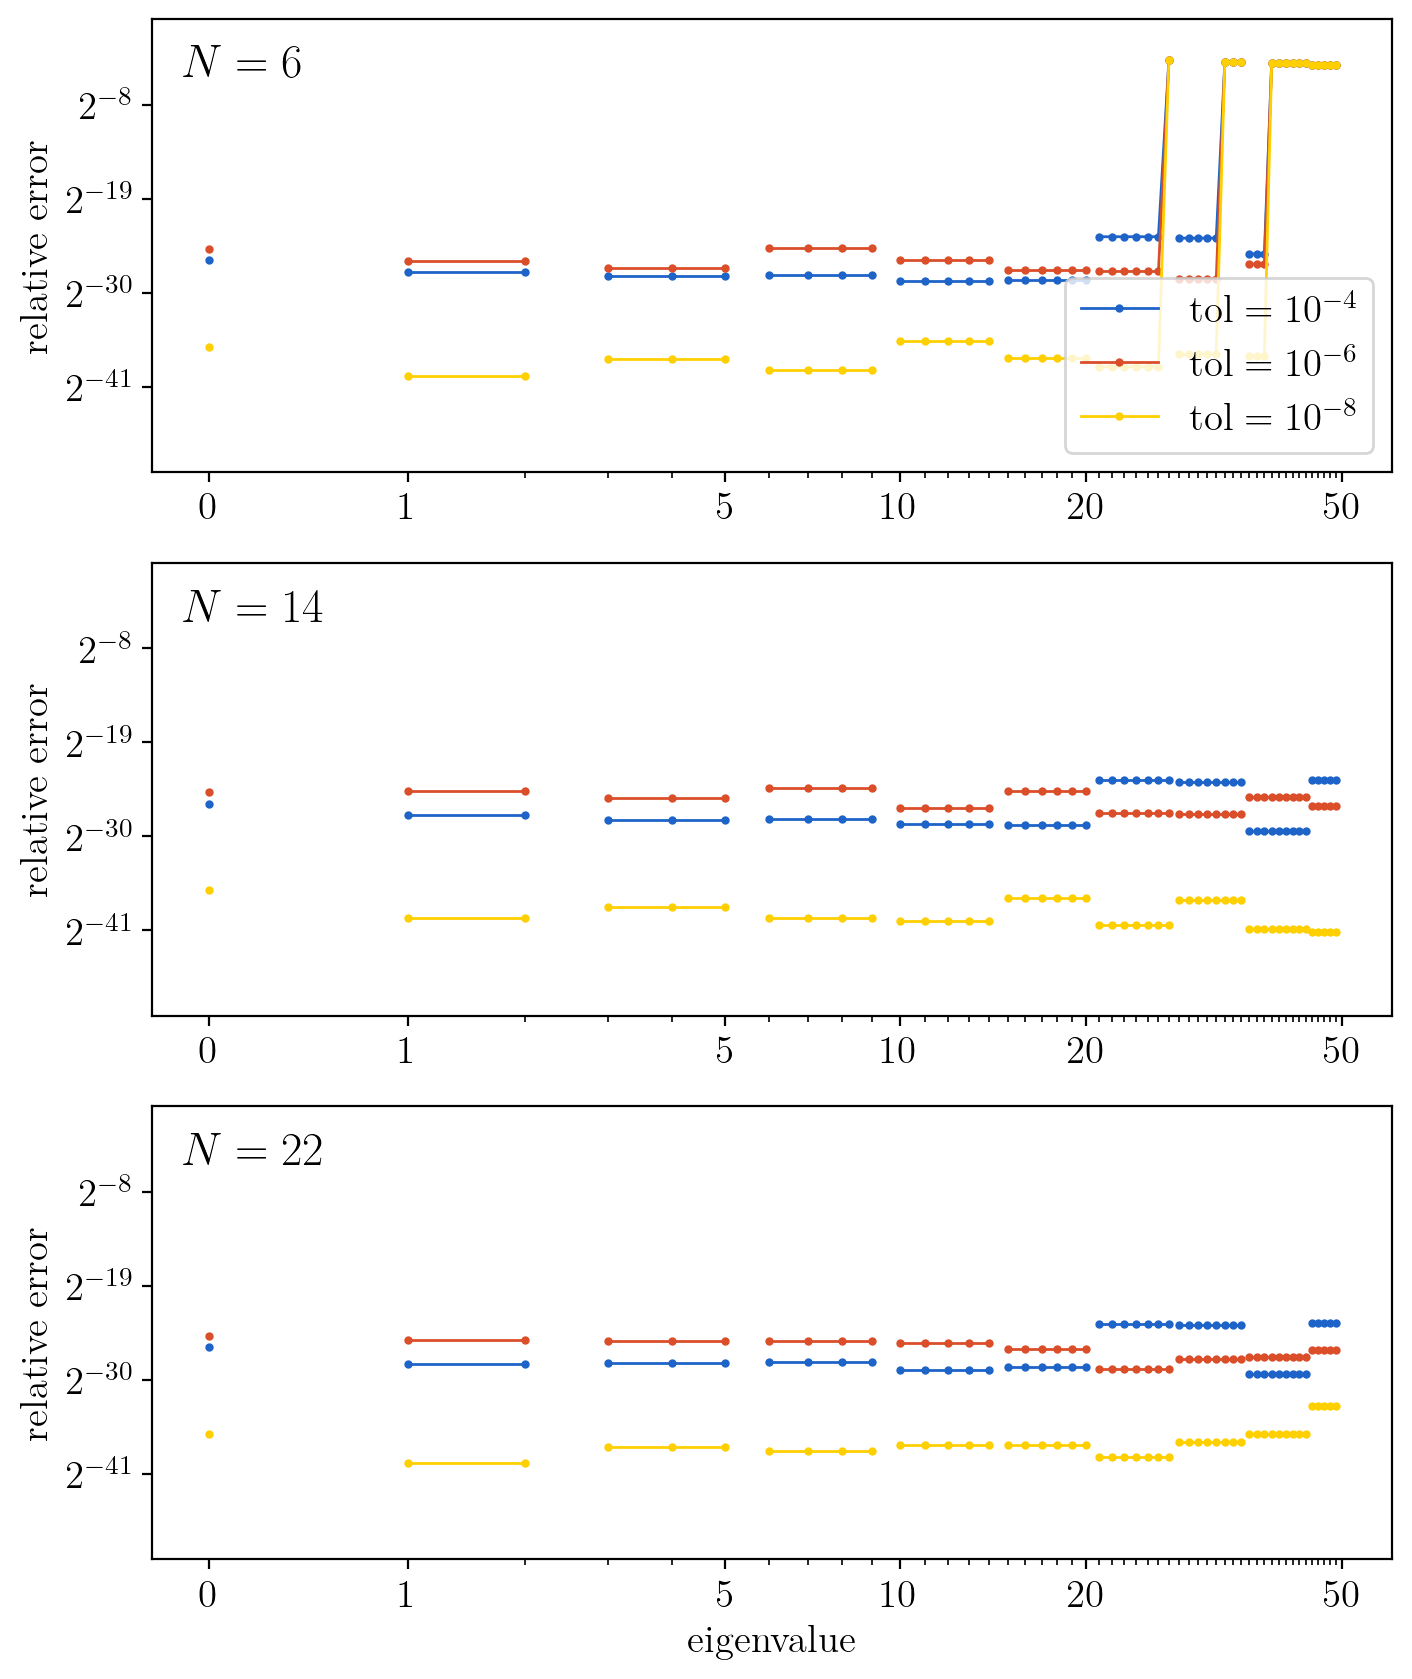

In [11]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(3, 1, figsize=(8, 10), dpi=200)

Ns = [6, 14, 22]
tols = [1e-4, 1e-6, 1e-8]

mults = range(1, 50)

for ni, N in enumerate(Ns):
    ax = axes[ni]
    ax.set_xscale('log', base=10)
    ax.set_yscale('log', base=2)
    xticks = [1, 2, 6, 11, 21, 51]
    ax.set_xticks(xticks, labels=[f"${x-1}$" for x in xticks])
    ax.set_xticks(range(51), minor=True, labels=[])
    ax.set_ylim(2**-51, 2**2)
    ax.set_ylabel("relative error")
    if ni == 2:
        ax.set_xlabel("eigenvalue")

    for i, tol in enumerate(tols):
        j = 0
        
        sector_count, raw = results[N, tol]
        print(N, tol, sector_count)
        k = len(raw)
        r = np.abs((raw - seigs[:k])/seigs[:k])

        kwargs = dict(
            label=f"$\\text{{tol}}=10^{{{np.round(np.log10(tol)):.0f}}}$",
            color=ugent.palet[i],
            marker='.', ls='-', lw=1, markersize=4,
        )
        for mult in mults:
            d = r[j:j+mult]
            ax.plot(range(j + 1, j+len(d)+1), d, **kwargs)
            if j == 0:
                del kwargs["label"]
            j += mult
            if j >= len(r):
                break

    ax.set_title(f"$N = {N}$", y=0.835, x=0.025, loc="left")


axes[0].legend(*axes[2].get_legend_handles_labels(), loc="lower right")
    
fig.show()
plt.savefig(f"harmonic_lobatto.pdf", bbox_inches="tight")

In [ ]:
da

In [18]:
in_double = [1.999999999991076693461878, 4.000000123093426118714433, 6.000000262460789102192393, 8.000000081599912604701785, 9.999999665906157630956841, 11.999999978354958685144993, 14.000000490098003069761035, 15.999999390410044597388151, 18.000000069078868847327612, 20.000000125586193888693742]

in_long_double = [2.000000000004244814135607, 4.000000000004232684949063, 5.999999999997525294663514, 7.999999998563047415734567, 10.000000001062239624385897, 11.999999927517199830966088, 14.000000004442515887277676, 15.999999988705135517928768, 17.999999930404440197026505, 19.999999993941346761172628]

exact = np.arange(2, 21, 2)

id_err = np.abs((np.array(in_double) - exact)/exact)
ild_err = np.abs((np.array(in_long_double) - exact)/exact)

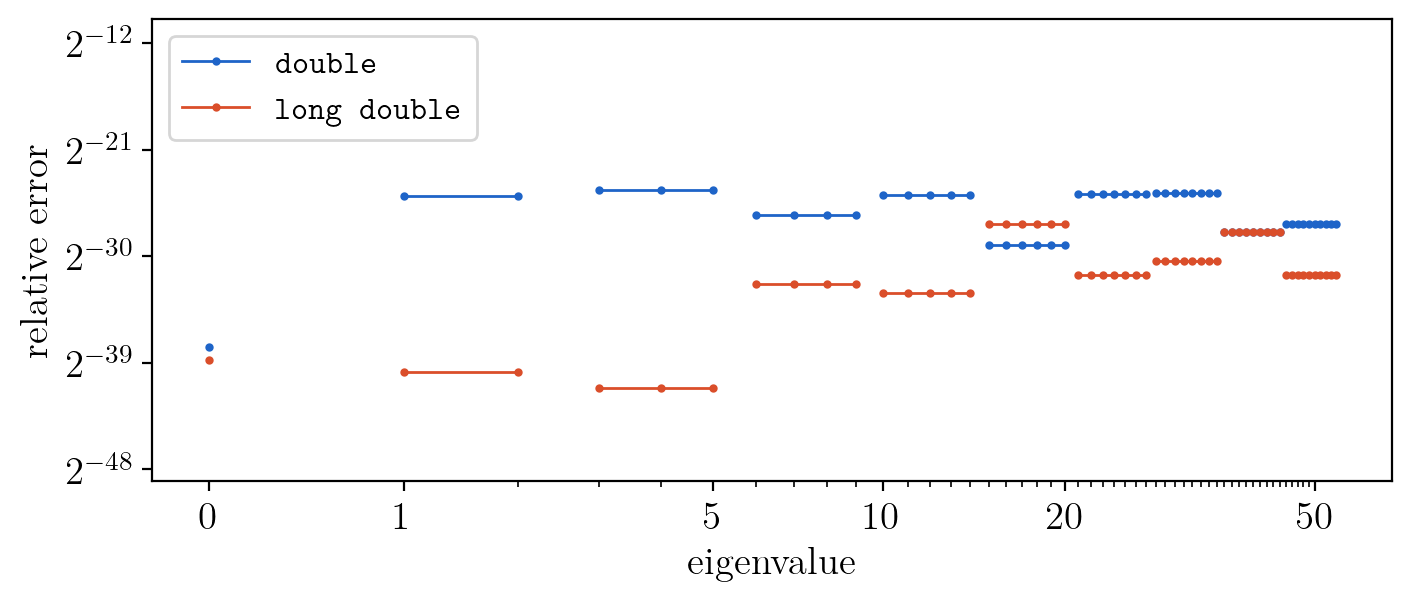

In [36]:
import matplotlib.pyplot as plt

# tolerance 10^-11
# 2 steps per sector
# 22 basis size

fig, ax = plt.subplots(1, 1, figsize=(8, 3), dpi=200)

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=2)
xticks = [1, 2, 6, 11, 21, 51]
ax.set_xticks(xticks, labels=[f"${x-1}$" for x in xticks])
ax.set_xticks(range(51), minor=True, labels=[])
ax.set_ylim(2**-49, 2**-10)
ax.set_yticks([2**-i for i in range(12, 49, 9)])
ax.set_ylabel("relative error")
if ni == 2:
    ax.set_xlabel("eigenvalue")

for i, data in enumerate([id_err, ild_err]):
    kwargs = dict(
        label=("\\texttt{double}" if i == 0 else "\\texttt{long double}"),
        color=ugent.palet[i],
        marker='.', ls='-', lw=1, markersize=4,
    )
    j = 0
    for m, d in enumerate(data):
        ax.plot(range(j + 1, j+m+2), [d]*(m+1), **kwargs)
        if j == 0:
            del kwargs["label"]
        j += m + 1
        if j >= len(r):
            break


ax.legend(loc="upper left", fontsize=12)
    
fig.show()
plt.savefig(f"harmonic_analysis.pdf", bbox_inches="tight")

In [32]:
48-12

36